In [ ]:
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


**Aerofit Case Study**

![**Aerofit**](https://encrypted-tbn2.gstatic.com/shopping?q=tbn:ANd9GcQXRkN2aQdT1D9OO3XQobaQVZW4-Dm4AuCXmjhQRG0T17niP9DK42supEPWZvr1drjAvFumb0-hqXHDMuEpTNkDipDCAQ2DV93dPi_2vqyX3NQRuPQqXabWUA)


● Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product
range including machines such as treadmills, exercise bikes, gym equipment, and
fitness accessories to cater to the needs of all categories of people.  
● The market research team at AeroFit wants to identify the characteristics of the target
audience for each type of treadmill offered by the company, to provide a better
recommendation of the treadmills to new customers. The team decides to investigate
whether there are differences across the product with respect to customer
characteristics.  
● Perform descriptive analytics to create a customer profile for each AeroFit treadmill
product by developing appropriate tables and charts.  
● Construct two-way contingency tables for each AeroFit treadmill product and compute
all conditional and marginal probabilities and their insights/impact on the business

In [ ]:
data = pd.read_csv('aerofit_treadmill.csv')
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


**Dataset Consists of:**  
    Product: Product Purchased KP281, KP481, or KP781  
    Age: In years  
    Gender: Male/Female  
    Education: in years  
    MaritalStatus: single or partnered  
    Usage: average number of times the customer plans to use the treadmill each week  
    Income: annual income (in $)  
    Fitness: self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.  
    Miles: average number of miles the customer expects to walk/run each week  


### <font color='darkblue'>**Basic Analysis**</font>

In [ ]:
data.shape

(180, 9)

In [ ]:
data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

<font color='purple'>🔍 Insight:  </font>
* Dataset has 180 rows and 9 columns
* In this dataset, Product, Gender, MaritalStatus are object type and other columns are int type

In [ ]:
data.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [ ]:
data['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

* Aerofit data set has 3 unique product types

In [ ]:
data['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

* Age of threadmill buyers is ranging from 18 to 42

In [ ]:
data['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

* Customer education ranging from 14 to 21

In [ ]:
data['MaritalStatus'].value_counts(normalize=True)

MaritalStatus
Partnered    0.594444
Single       0.405556
Name: proportion, dtype: float64

* Partnered threadmill users percentage is 59.4%
* Single threadmill users percentage is 40.5%

In [ ]:
data['Usage'].value_counts(normalize=True)

Usage
3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: proportion, dtype: float64

* Number of times threadmill usages per week follow patter of 3>4>2>5>6>7

In [ ]:
data['Product'].value_counts(normalize=True)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

In [ ]:
data['Gender'].value_counts(normalize=True)

Gender
Male      0.577778
Female    0.422222
Name: proportion, dtype: float64

In [ ]:
data['Education'].value_counts(normalize=True)

Education
16    0.472222
14    0.305556
18    0.127778
15    0.027778
13    0.027778
12    0.016667
21    0.016667
20    0.005556
Name: proportion, dtype: float64

In [ ]:
data['Fitness'].value_counts(normalize=True)

Fitness
3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: proportion, dtype: float64

<font color='purple'>🔍 Insight:</font>  
* Product: Data Set has 3 Product KP281, KP481, KP781, where KP281 probabality of selling percentage is more compared to other.  
* Gender: Male users are more than the female users(Male=57.7, Female=42.2)  
* Eductaion: Customers who has education of 16 are the highest buyers than others
* Fitness: People who rated 3 are the most threadmill users   

In [ ]:
data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

<font color='purple'>* No missing values present in any of the columns</font>

## <font color='darkblue'>**Visual and Non-Visual Analysis and Outliers detection**</font>

### <font color='teal'>**Univariate Analysis**</font>

In [ ]:
data['Product'].value_counts() #Types of Products in Aerofit

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

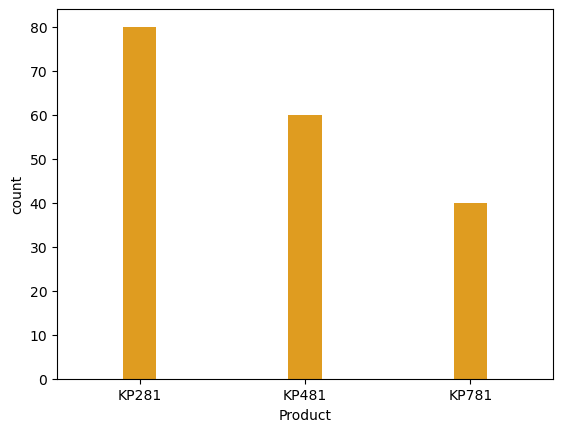

In [ ]:
sns.countplot(data=data, x='Product', color='orange', width=0.2)
plt.show()

📊 Observation:
* Number of product KP281 sold is 80
* Number of product KP481 sold is 60
* Number of product KP781 sold is 40

In [ ]:
data['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

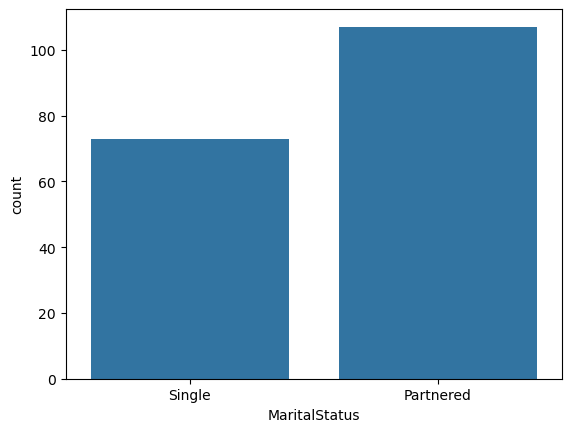

In [ ]:
sns.countplot(data=data, x='MaritalStatus')
plt.show()

📊 Observation:
* Number of Partnered customer who purchased are 107
* Number of single customer who purchased are 73

In [ ]:
data['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

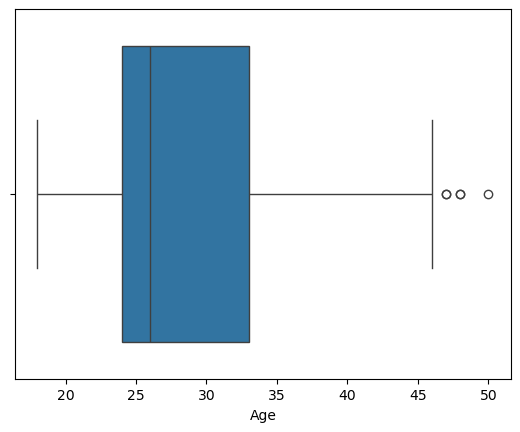

In [ ]:
sns.boxplot(x='Age', data=data)
plt.show()

* Median age threadmill users are of the age of 26

In [ ]:
# Age column outlier detection

age_25 = np.percentile(data['Age'], 25)
age_75 = np.percentile(data['Age'], 75)
age_iqr = age_75 - age_25
age_upper_limit = age_75 + 1.5*age_iqr
age_outlier = data[data['Age'] > age_upper_limit]
age_outlier


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
data['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

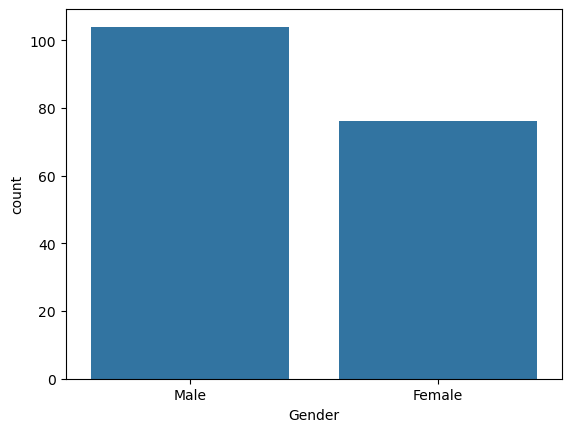

In [ ]:
sns.countplot(data=data, x='Gender')
plt.show()

📊 Majority of the threadmill users are Male

In [ ]:
data['Education'].describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

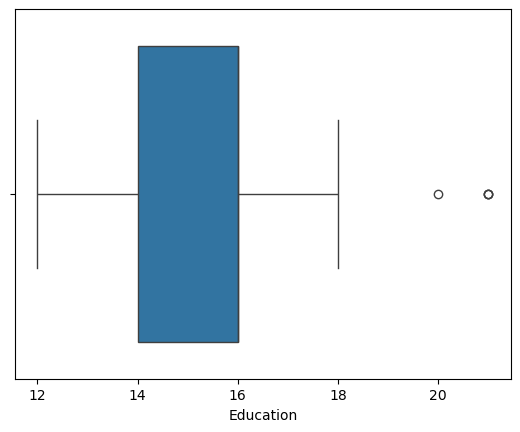

In [ ]:
sns.boxplot(x='Education', data=data)
plt.show()

* People with the education in between 14 to 16 are the most of the users

In [ ]:
# Education column outlier detection

education_25 = np.percentile(data['Education'], 25)
education_75 = np.percentile(data['Education'], 75)
education_iqr = education_75 - education_25
education_upper_limit = education_75 + 1.5*education_iqr
education_outlier = data[data['Education'] > education_upper_limit]
education_outlier

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200


In [ ]:
data['Usage'].describe()

count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

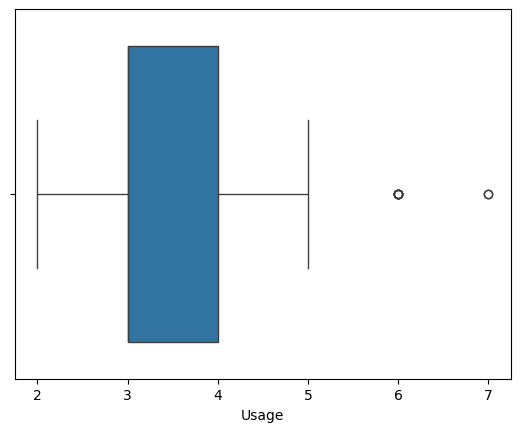

In [ ]:
sns.boxplot(x='Usage', data=data)
plt.show()

* Customers who are using threadmill 3 to 4 times a week are the most of the users

In [ ]:
# Usage column outlier detection

usage_25 = np.percentile(data['Usage'], 25)
usage_75 = np.percentile(data['Usage'], 75)
usage_iqr = usage_75 - usage_25
usage_upper_limit = usage_75 + 1.5*usage_iqr
usage_outlier = data[data['Usage'] > usage_upper_limit]
usage_outlier

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240
162,KP781,28,Female,18,Partnered,6,5,92131,180
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
175,KP781,40,Male,21,Single,6,5,83416,200


In [ ]:
data['Fitness'].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

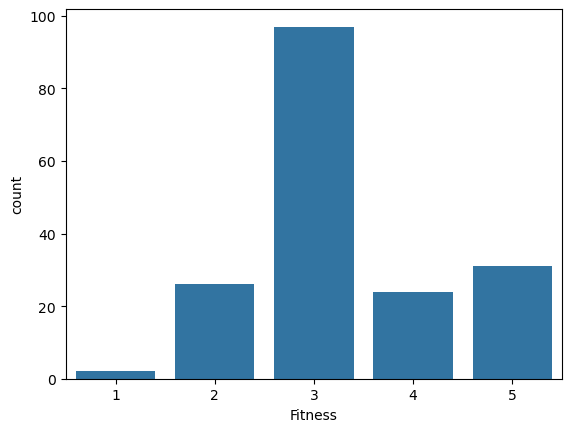

In [ ]:
sns.countplot(x='Fitness', data=data)
plt.show()

* Customers who rated 3 as a fitness rating are the most of the buyers

In [ ]:
data['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

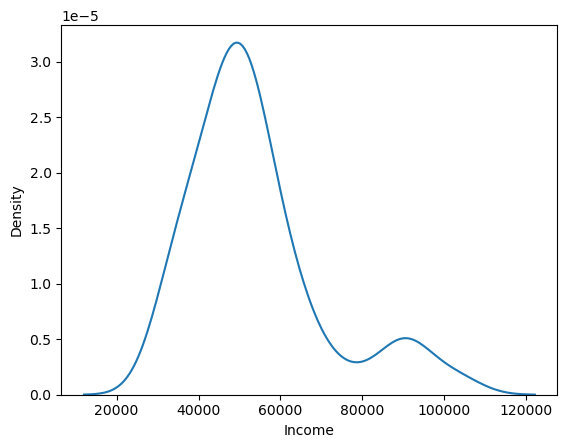

In [ ]:
sns.kdeplot(x='Income', data=data)
plt.show()

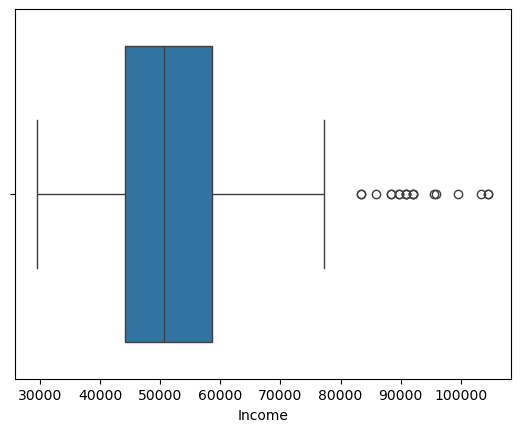

In [ ]:
sns.boxplot(x='Income', data=data)
plt.show()

* Customers who is having median income of 50000 are the most of the buyers

In [ ]:
# Income column outlier detection

income_25 = np.percentile(data['Income'], 25)
income_75 = np.percentile(data['Income'], 75)
income_iqr = income_75 - income_25
income_upper_limit = income_75 + 1.5*income_iqr
income_outlier = data[data['Income'] > income_upper_limit]
income_outlier

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


In [ ]:
data['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

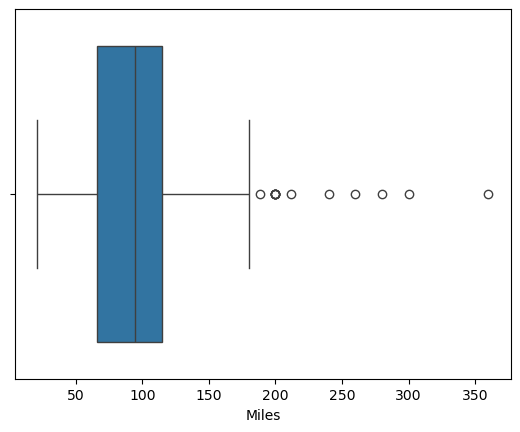

In [ ]:
sns.boxplot(x='Miles', data=data)
plt.show()

* Customers who is daily walk/run of 66 to 114 miles are the majority of the buyers

In [ ]:
# Miles column outlier detection

miles_25 = np.percentile(data['Miles'], 25)
miles_75 = np.percentile(data['Miles'], 75)
miles_iqr = miles_75 - miles_25
miles_upper_limit = miles_75 + 1.5*miles_iqr
miles_outlier = data[data['Miles'] > miles_upper_limit]
miles_outlier

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


In [ ]:
# Cliping below 0.05 and above 0.95 outliers

continuous_cols = ['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']


for i, col in enumerate(continuous_cols):
    lower = data[col].quantile(0.05)
    upper = data[col].quantile(0.95)
    data[col] = np.clip(data[col], lower, upper)
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.00,Male,14,Single,3.00,4,34053.15,112
1,KP281,20.00,Male,15,Single,2.00,3,34053.15,75
2,KP281,20.00,Female,14,Partnered,4.00,3,34053.15,66
3,KP281,20.00,Male,14,Single,3.00,3,34053.15,85
4,KP281,20.00,Male,14,Partnered,4.00,2,35247.00,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40.00,Male,18,Single,5.05,5,83416.00,200
176,KP781,42.00,Male,18,Single,5.00,4,89641.00,200
177,KP781,43.05,Male,16,Single,5.00,5,90886.00,160
178,KP781,43.05,Male,18,Partnered,4.00,5,90948.25,120


### <font color='teal'>**Bi-Varaite Analysis**</font>

In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66
3,KP281,20.0,Male,14,Single,3.0,3,34053.15,85
4,KP281,20.0,Male,14,Partnered,4.0,2,35247.00,47


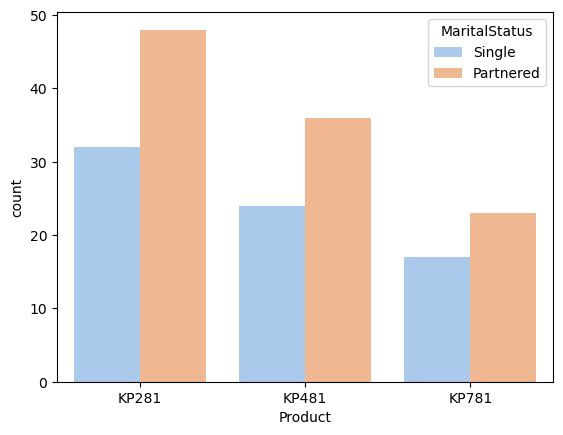

In [ ]:
sns.countplot(x='Product', hue='MaritalStatus', data=data, palette='pastel')
plt.show()

* 📊 Graph shows that Partnered customers have high demand on the threadmill and most likely to buy KP281

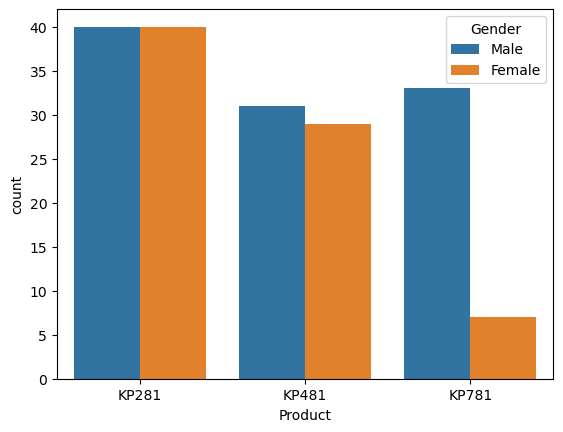

In [ ]:
sns.countplot(x='Product', hue='Gender', data=data)
plt.show()

* 📊 Female customers are least likely to buy KP781 product and it is recommended that they may like KP281 and KP481

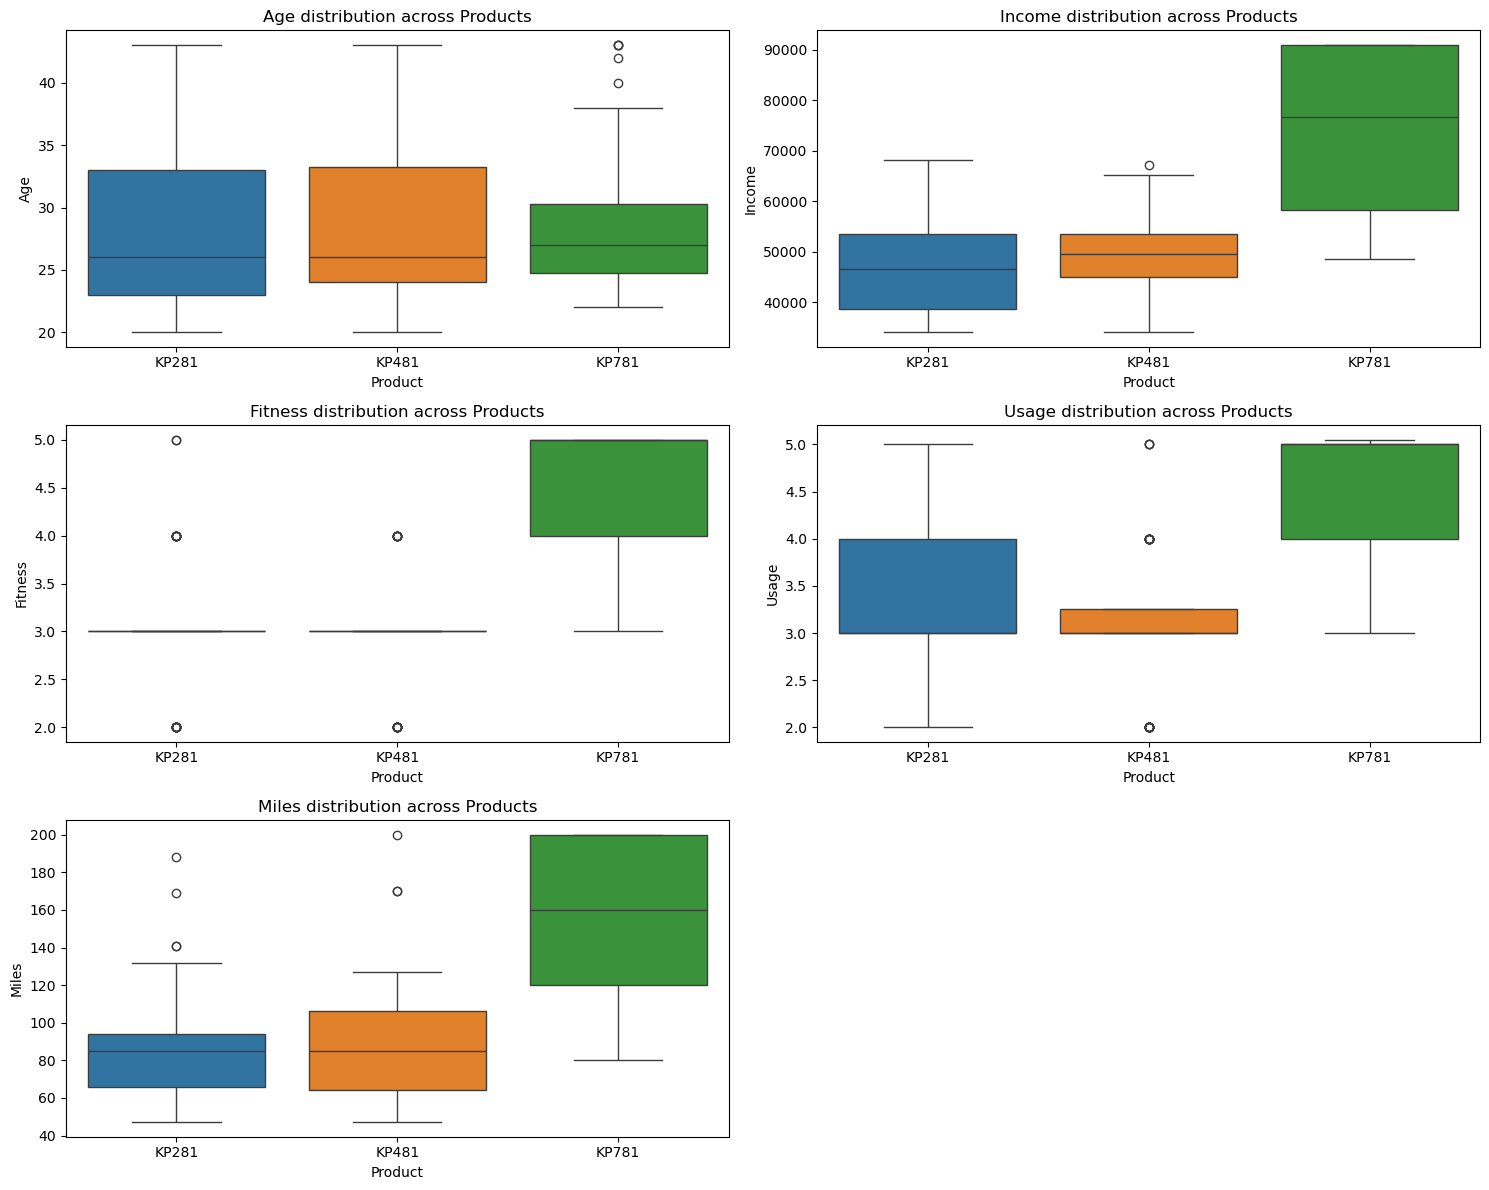

In [ ]:
continuous_cols = ['Age', 'Income', 'Fitness', 'Usage', 'Miles']

plt.figure(figsize=(15, 12))
for i, col in enumerate(continuous_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=data, x='Product', y=col, hue='Product')
    plt.title(f'{col} distribution across Products')
plt.tight_layout()
plt.show()

🔍 Insight:
* Average customer Age of all the 2 products are = 26
* Customers who is purchase KP781 are the more income buyers
* Average fitness rating of KP281 and KP481 buyers are 3 and KP781 are higher than other two
* Usage per week for KP281 is 3-4, KP481 is 3 and KP781 are 4-5
* Avgerage walk/run Miles/week of KP281 is around 65 to 90, KP481 is around 65 to 110 and KP781 is 120 to 190

In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66
3,KP281,20.0,Male,14,Single,3.0,3,34053.15,85
4,KP281,20.0,Male,14,Partnered,4.0,2,35247.00,47


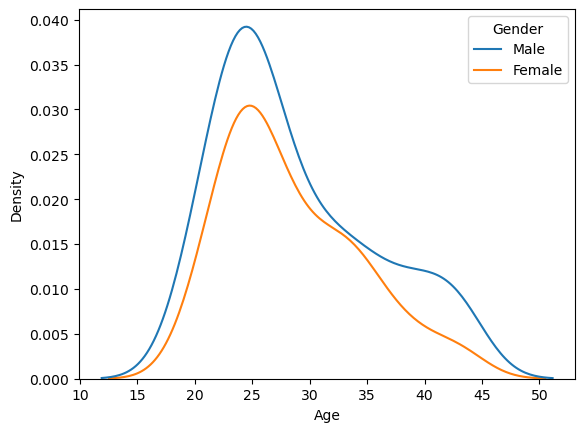

In [ ]:
sns.kdeplot(x='Age', hue= 'Gender', data=data)
plt.show()

**📊 Observation:**  
* Male customers with the age of 20 to 35 years are the most threadmill users  

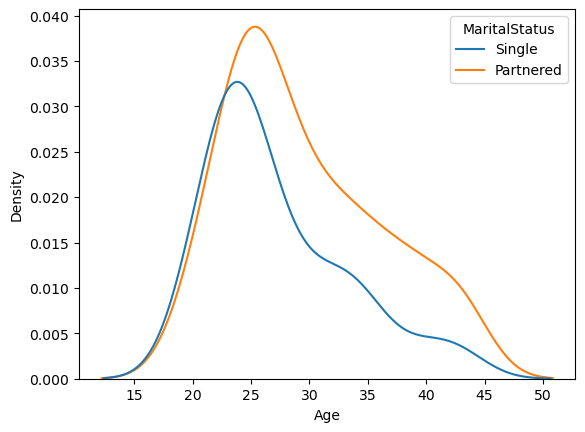

In [ ]:
sns.kdeplot(x='Age', hue= 'MaritalStatus', data=data)
plt.show()

**📊 Observations:-**
* Partnered users with the age of 20 to 30 years are the most users purchased threadmill

<Axes: xlabel='Age', ylabel='Density'>

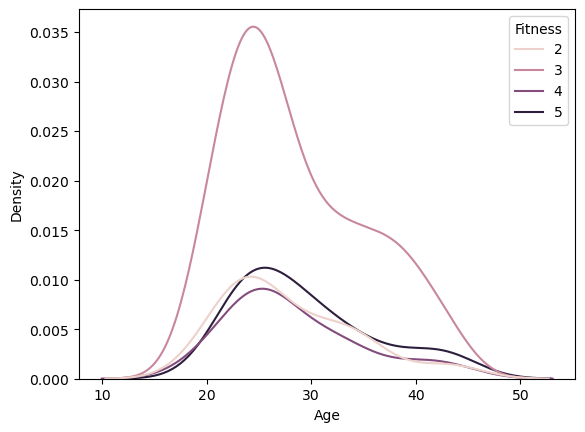

In [ ]:
sns.kdeplot(data=data, x='Age',  hue='Fitness')

* Most of the users are 3 rated as fitness rating users

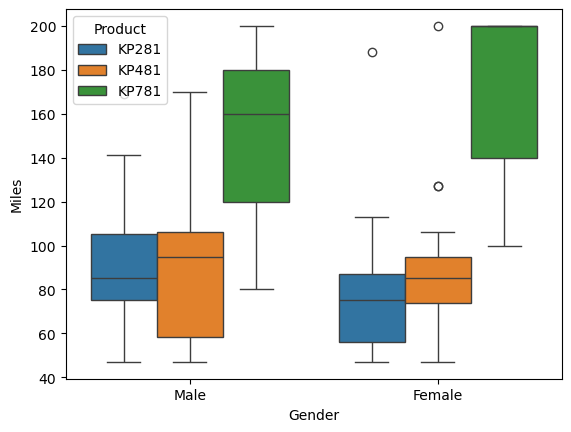

In [ ]:
sns.boxplot(x="Gender", y="Miles", hue="Product", data=data)
plt.show()

* Miles/Week has impact on product purchase on KP781, would suggest if they walk morethan 120miles/week

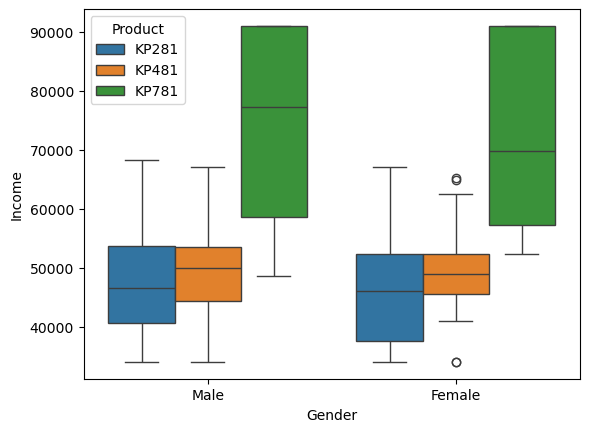

In [ ]:
sns.boxplot(x="Gender", y="Income", hue="Product", data=data)
plt.show()

* Income has positive effect on Product purchase and we can see from the above with greater income customer would like to choose KP781

## <font color='darkblue'>**Probabilistic Insight🔍:**</font>

In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66
3,KP281,20.0,Male,14,Single,3.0,3,34053.15,85
4,KP281,20.0,Male,14,Partnered,4.0,2,35247.00,47


In [ ]:
pd.crosstab(index=data['Gender'], columns=data['Product'], margins=True, normalize="index") * 100

Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769
All,44.444444,33.333333,22.222222


In [ ]:
pd.crosstab(index=data['Gender'], columns=data['Product'], margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


#### <font color='teal'>**Marginal probabilities**</font>

In [ ]:
#KP281

(80/180)*100

44.44444444444444

In [ ]:
#KP481

(60/180)*100

33.33333333333333

In [ ]:
#KP781

(40/180)*100

22.22222222222222

**Observations:**
* Probabality of customer buying KP281 product is 44.4%
* Probabality of customer buying KP481 product is 33.3%
* Probabality of customer buying KP781 product is 22.2%

In [ ]:
data['Product'].value_counts(normalize=True)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

In [ ]:
data['Gender'].value_counts(normalize=True)

Gender
Male      0.577778
Female    0.422222
Name: proportion, dtype: float64

In [ ]:
data['MaritalStatus'].value_counts(normalize=True)

MaritalStatus
Partnered    0.594444
Single       0.405556
Name: proportion, dtype: float64

#### <font color='teal'>**Conditional probabilities**</font>

In [ ]:
pd.crosstab(index=data['Gender'], columns=data['Product'], margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [ ]:
# Probabality of purchasing KP281 given that customer is Male (KP281|Male)

(40/104)*100

38.46153846153847

In [ ]:
# Probabality of purchasing KP481 given that customer is Male (KP481|Male)

(31/104)*100

29.807692307692307

In [ ]:
# Probabality of purchasing KP781 given that customer is Male (KP781|Male)

(33/104)*100

31.73076923076923

In [ ]:
# Probabality of purchasing KP281 given that customer is Female (KP281|Female)

(40/76)*100

52.63157894736842

In [ ]:
# Probabality of purchasing KP481 given that customer is Female (KP481|Female)

(29/76)*100

38.15789473684211

In [ ]:
# Probabality of purchasing KP781 given that customer is Female (KP781|Female)

(7/76)*100

9.210526315789473

In [ ]:
# Probabality that Male customer purchases product, give that KP281 shown (Male|KP281)

(40/80)*100

50.0

In [ ]:
# Probabality that Male customer purchases product, give that KP481 shown (Male|KP481)

(31/60)*100

51.66666666666667

In [ ]:
# Probabality that Male customer purchases product, give that KP781 shown (Male|KP781)

(33/40)*100

82.5

In [ ]:
# Probabality that Female customer purchases product, give that KP281 shown (Female|KP281)

(40/80)*100

50.0

In [ ]:
# Probabality that Female customer purchases product, give that KP481 shown (Female|KP481)

(29/60)*100

48.333333333333336

In [ ]:
# Probabality that Female customer purchases product, give that KP781 shown (Female|KP781)

(7/40)*100

17.5

**🔍 Insight:**  
* Probabality of purchasing KP281 given that customer is Male (KP281|Male)=38.46
* Probabality of purchasing KP481 given that customer is Male (KP481|Male)=29.80
* Probabality of purchasing KP781 given that customer is Male (KP781|Male)=31.73
* Probabality of purchasing KP281 given that customer is Female (KP281|Female)=52.63
* Probabality of purchasing KP481 given that customer is Female (KP481|Female)=38.15
* Probabality of purchasing KP781 given that customer is Female (KP781|Female)=9.21
* Probabality that Male customer purchases product, give that KP281 shown (Male|KP281)=50.0
* Probabality that Male customer purchases product, give that KP481 shown (Male|KP481)=51.66
* Probabality that Male customer purchases product, give that KP781 shown (Male|KP781)=82.50
* Probabality that Female customer purchases product, give that KP281 shown (Female|KP281)=50.0
* Probabality that Female customer purchases product, give that KP481 shown (Female|KP481)=48.33
* Probabality that Female customer purchases product, give that KP781 shown (Female|KP781)=17.5



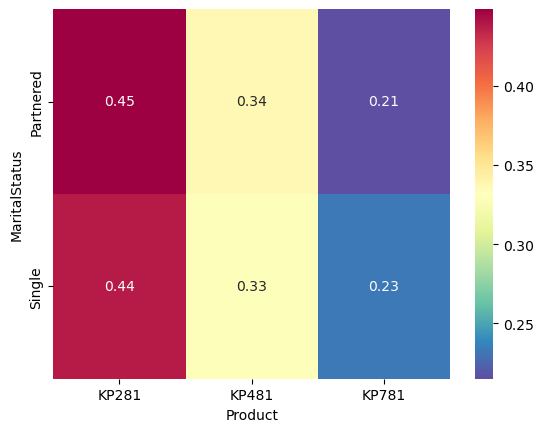

In [ ]:
sns.heatmap(pd.crosstab(data['MaritalStatus'], data['Product'], normalize='index'), annot=True, cmap='Spectral_r')
plt.show()

**Conditional Probability, P(Product | MaritalStatus)**  

    1. Probability of buying KP281 given that the marital status is single, P(Product=KP281 | MaritalStatus=Single) = 0.44.  
    2. Probability of buying KP481 given that the marital status is single, P(Product=KP481 | MaritalStatus=Single) = 0.33.  
    3. Probability of buying KP781 given that the marital status is single, P(Product=781 | MaritalStatus=Single) = 0.23.  
    4. Probability of buying KP281 given that the marital status is partnered, P(Product=KP281 | MaritalStatus=Single) = 0.45.  
    5. Probability of buying KP481 given that the cmarital status is partnered, P(Product=KP481 | MaritalStatus=Single) = 0.34.  
    6. Probability of buying KP781 given that the marital status is partnered, P(Product=KP781 | MaritalStatus=Single) = 0.21.  

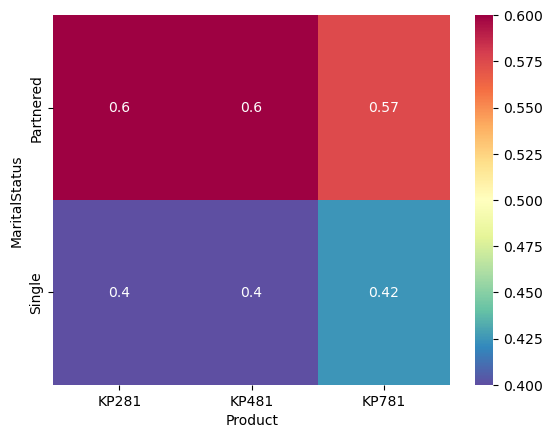

In [ ]:
sns.heatmap(pd.crosstab(data['MaritalStatus'], data['Product'], normalize='columns'), annot=True, cmap='Spectral_r')
plt.show()

**Conditional Probability P(MaritalStatus | Product)**  

    1. Probability of Marital Status being Single given that KP281 is purchased, P(MaritalStatus=Single | Product=KP281) = 0.40.
    2. Probability of Marital Status being Parterned given that KP281 is purchased, P(MaritalStatus=Parterned | Product=KP281) = 0.60.
    3. Probability of Marital Status being Single given that KP481 is purchased, P(MaritalStatus=Single | Product=KP481) = 0.4.
    4. Probability of Marital Status being Partnered given that KP481 is purchased, P(MaritalStatus=Partnered | Product=KP481) = 0.6.
    5. Probability of Marital Status being Single given that KP781 is purchased, P(MaritalStatus=Single | Product=KP781 ) = 0.42.
    6. Probability of Marital Status being Partnered given that KP781 is purchased, P(MaritalStatus=Partnered | Product=KP781 ) = 0.57.

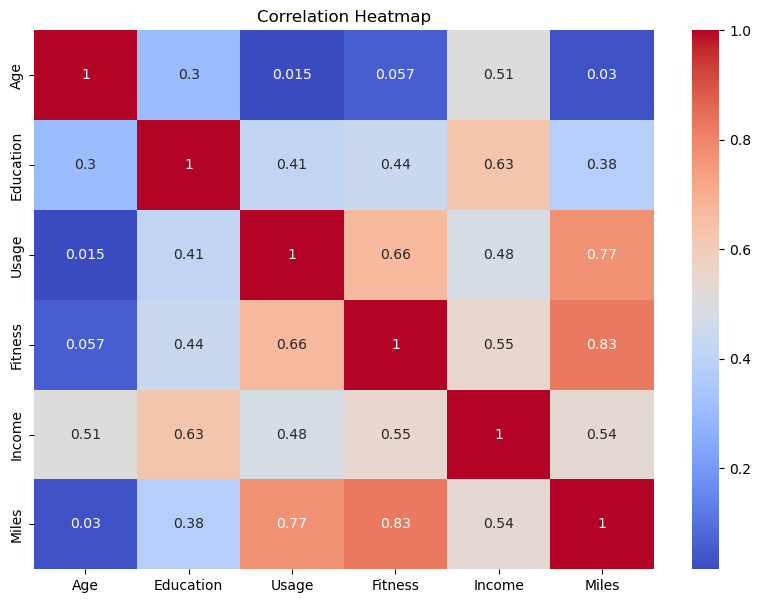

In [ ]:
# Correlation Heatmap
numeric_df = data.select_dtypes(include='number')

plt.figure(figsize=(10, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


📊 **Observation:**  
Here Pearson co-efficient is used to evalute the correlation between numerical data points. Pearson evalutes the linear relationship between data points.

Noting down the observations which are higher than 0.5.  

    1.Correlation between Age & Income is 0.51  
    2.Correlation between Education & Income is 0.63.  
    3.Correlation between Usage & Fitness is 0.67.  
    4.Correlation between Usage & Income is 0.52.  
    5.Correlation between Usage & Miles is 0.76.  
    6.Correlation between Fitness & Income is 0.54.  
    7.Correlation between Fitness & Miles is 0.79.  
    8.Correlation between Income & Miles is 0.54.  

🧍‍♂️🧍‍♀️ **Customer Profiling by Product**

🚶‍♂️ **KP281 – Entry-Level Model**  

* Age: Mostly between 22-33 years  
* Income: $38,000- $50,000  
* Fitness Level: Low (3)  
* Usage: 3-4 days/week  
* Gender: Gender friendly  
* Miles/Week: 70-90  
* MaritalStatus: Partnered friendly
* Demographics: Young, single males dominate this segment  

**Recommendations:**  

* Position as a starter treadmill for casual users.

🏃 **KP481 – Mid-Tier Model**  


* Age: 25–33 years  
* Income: $45,000–$55,000  
* Fitness Level: Moderate (3–4)  
* Usage: 3–4 days/week  
* Gender: Higher preference among females  
* Miles/Week: 70-100
* Marital Status: Balanced, but slightly more partnered users  

**Recommendations:**  

* Position as an all-rounder treadmill for home and shared use.


🏋️‍♂️ **KP781 – Premium Model**  

* Age: 24-30 years
* Income: >$58,000
* Fitness Level: High (4–5)
* Usage: 4–5 days/week
* Gender: Higher preference among males
* Miles/Week: High
* Demographics: Serious fitness users, gym owners, and corporate professionals

**Recommendations:**   

* Market as a high-end, performance-focused treadmill.
* Target corporate wellness buyers, premium fitness clubs, and athletes.
* Highlight smart features, build quality, and long-term value.

**Overall Recommendations:**  
1. Promote KP281 and KP481 treadmills as budget-friendly option, especially targeting customers with annual incomes in the range of 38K - 55K Dollars
2. Market KP781 treadmill as a premium product with advanced features, targeting professionals and athletes.
3. Enhance the marketing strategy for KP781 by associating it with renowned athletes like Neeraj Chopra, Virat Kohili by leveraging their achievements for better outreach.
4. Run special marketing campaigns on Yoga day, Women's Day and Mother's Day to encourage more women to adopt an exercise routine, highlighting the benefits of using our treadmills.
5. Encourage existing customers to upgrade their treadmills to high-end models as their usage increases over time, leading to increased revenue for the business.
6. Ruleout exchange offers for low-end treadmill to buy higher-end treadmill.

**Details:**  
Name: Nishanth Gowda  
Email: nishanthgowdahsn27@gmail.com  